Шепелев Д.

# **I. Прочитайте пункт “Линейные методы регрессии и классификации” и рекомендованную литературу к нему и ответьте на вопросы.**

**1. В каком виде ищется решение в задаче восстановления регрессии? На что влияет коэффициент $w_0$?**

В линейной модели восстановления регрессии решение ищется в виде линейной функции: суммы всех признаков $f_i(x)$ с коэффициентами $w_i$ (взвешенная сумма всех признаков):

$a(x, w) = w_0 + \sum_{i=1}^{n} f_i(x)w_i $

$w_0$ - смещение, решение не всегда будет проходить через начало координат

**2. Какой вид имеет функция потерь в методе наименьших квадратов?**

В методе наименьших квадратов используется квадратичная функция потерь:

$L(a, y) = (a_i - y_i)^2$

**3. Как в методе наименьших квадратов находится минимум?**

Минимум функционала качества $Q(w)$ ищестя из условия равенства нулю всех производных $\frac{dQ(w)}{dw_k}=0$ 

Задача сводится к решению СЛАУ:

$\sum_{j=1}^{n} w_j \sum_{i=1}^{l} f_j(x_i)f_k(x_i) = \sum_{i=1}^{l} y_i f_k(x_i)$

**4. В каком виде ищется решение в задаче классификации? Какой геометрический смысл вектора коэффициентов $w$?**

В задаче классификации решение ищется в виде разделяющей функции знака числа от взвешенной суммы всех признаков.

Вектор коэффициентов $w$ в геометрическом смысле являются параметрами гиперплоскости раздляющей пространство с данными.

**5. В чем недостаток использования пороговой функции потерь?**

Функционал качества с такой функцией потерь будет кусочнопостоянным (т.к. она не говорит о величине ошибки), его нельзя продифференцировать и приравнять нулю производные как в методе наименьших квадратов.

**6. Что такое отступ? Когда он бывает положительным и отрицательным? Какую еще информацию можно узнать с помощью него?**

Отступ - величина, предоставляющая информацию о наличии ошибки (положителен при отсутствии ошибки, отрицателен при наличии) и величине ошибки - чем больше отступ по модулю, тем дальше объект от гиперплоскости.

**7. Какие бывают функции потерь?**

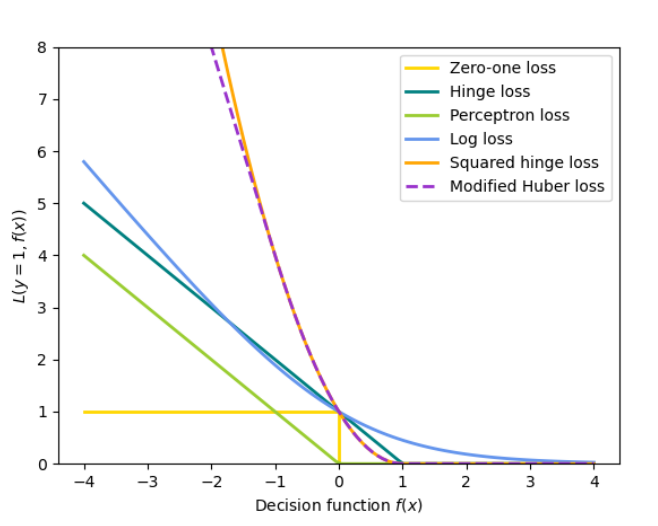

# **II. Прочитайте пункт “Метод стохастического градиента” и рекомендованную лиературу к нему и ответьте на вопросы**

**1. В чем отличия метода стохастического градиента от метода градиентного спуска?**

В SGD обновление весов производится сразу после вычисления функции потерь в на одном случайном примере, тогда как в вычислении обычного градиента учаситвует вся выборка.  

**2. Зачем делается регуляризация?**

Для избежания переобучения, признаком которого являются большие по модулю значения весов.

**3. Какие параметры можно задавать в методе?** 

SGDClassifier и SGDRegressor
- loss = ‘hinge’ || 'squared_error'
- penalty = ‘l2’
- alpha = 0.0001
- learning_rate = ’optimal’

**4. Какие преимущества и недостатки метода стохастического градиента?**

Плюсы
- легко реализуется
- легко обобщается на нео=линейные модели и любые функции потель
- подходит для больших данных
- не требует обработки всей выборки для оптимального решения

Минусы
- возможна расходимость или медленная сходимость
- застревание в локальных минимумах
- много гиперпараметров
- возможно переобучение

# **III. Выполните задание из в файла "statement-linear.pdf"**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('perceptron-train.csv', header=None)
test = pd.read_csv('perceptron-test.csv', header=None)

In [3]:
y_train = train.iloc[:,0]
x_train = train.iloc[:,1:]
y_train.head(3)

0   -1.0
1    1.0
2   -1.0
Name: 0, dtype: float64

In [4]:
y_test = test.iloc[:,0]
x_test = test.iloc[:,1:]
y_test.head(3)

0   -1.0
1    1.0
2   -1.0
Name: 0, dtype: float64

In [5]:
model = SGDClassifier(random_state=241)
model.fit(x_train, y_train)

SGDClassifier(random_state=241)

In [7]:
y_pred = model.predict(x_test)
score1 = accuracy_score(y_test, y_pred)
print(f'Точность: {score1}')

Точность: 0.655


In [8]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

model = SGDClassifier(random_state=241)
model.fit(x_train_sc, y_train)

y_pred_sc = model.predict(x_test_sc)

score2 = accuracy_score(y_test, y_pred_sc)

print(f'Точность: {score2}')

Точность: 0.845


In [11]:
print(f'Разница в точности до нормализации и после: {abs(round(score1-score2, 4))}')

Разница в точности до нормализации и после: 0.19
